In [1]:
from numpy.random import seed
seed(42)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as datetime

In [2]:
data = pd.read_csv('All_wells_final3.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data = data.fillna(0)

data.info()
perf_dict={}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   7882 non-null   object 
 1   WELL_BORE_CODE            7882 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     7882 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  7882 non-null   float64
 4   AVG_DP_TUBING             7882 non-null   float64
 5   AVG_ANNULUS_PRESS         7882 non-null   float64
 6   AVG_CHOKE_SIZE_P          7882 non-null   float64
 7   AVG_WHP_P                 7882 non-null   float64
 8   AVG_WHT_P                 7882 non-null   float64
 9   DP_CHOKE_SIZE             7882 non-null   float64
 10  BORE_OIL_VOL              7882 non-null   float64
 11  BORE_GAS_VOL              7882 non-null   float64
 12  BORE_WAT_VOL              7882 non-null   float64
 13  WELL_POS                  7882 non-null   object 
dtypes: float

In [3]:
data=data.drop(['AVG_ANNULUS_PRESS'], axis=1)
data = data.loc[data['AVG_DOWNHOLE_PRESSURE']!= 0]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 7881
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 4   AVG_DP_TUBING             5943 non-null   float64
 5   AVG_CHOKE_SIZE_P          5943 non-null   float64
 6   AVG_WHP_P                 5943 non-null   float64
 7   AVG_WHT_P                 5943 non-null   float64
 8   DP_CHOKE_SIZE             5943 non-null   float64
 9   BORE_OIL_VOL              5943 non-null   float64
 10  BORE_GAS_VOL              5943 non-null   float64
 11  BORE_WAT_VOL              5943 non-null   float64
 12  WELL_POS                  5943 non-null   object 
dtypes: float64(10), object(3)
memory usage: 650.0+ KB


In [4]:
#Creating two dataframes, one with well bore code, df2 and the other without 
df1 = data.loc[:,'AVG_CHOKE_SIZE_P':'BORE_WAT_VOL']
feature_names = df1.columns


df2 = data.loc[:,'WELL_BORE_CODE':'BORE_WAT_VOL']
df2=df2.drop(['AVG_DOWNHOLE_PRESSURE','AVG_DP_TUBING'],axis=1)
feature_names_2 = df2.columns
df2.head()

,WELL_BORE_CODE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,NO 15/9-F-1 C,106.35,43.34,107.36,37.94,78.94,631.47,90439.09,0.0
1,NO 15/9-F-1 C,107.64,47.17,99.19,60.76,70.63,1166.46,165720.39,0.0
2,NO 15/9-F-1 C,107.87,47.73,94.60,63.05,66.05,1549.81,221707.31,0.0
3,NO 15/9-F-1 C,107.97,48.53,89.99,64.55,61.41,1248.70,178063.52,0.0
4,NO 15/9-F-1 C,108.05,49.84,84.78,65.72,56.15,1345.78,192602.19,0.0


In [5]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)

In [6]:
print(X.shape)
print(y.shape)

(5943, 7)
(5943, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
#Scaling X and Y data
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler

y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

LINEAR REGRESSION

In [ ]:

model = LinearRegression()

# Plot the Residuals for the Training and Testing data
predictions = model.predict(X_train_scaled)
predictions1 = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_train_scaled, c= "orange",label="Training Data", s=8)
plt.scatter(predictions1, predictions1 - y_test_scaled, c= "blue",label="Testing Data",s=8)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.legend()
plt.show()
# Model Scores
from sklearn.metrics import mean_squared_error, r2_score
# Score the prediction with mse and r2
mse_train = mean_squared_error(y_train_scaled, predictions)
r2_train = r2_score(y_train_scaled, predictions)
mse_test = mean_squared_error(y_test_scaled, predictions1)
r2_test = r2_score(y_test_scaled, predictions1)
print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")

RIDGE REGRESSION

In [9]:
from sklearn.linear_model import Ridge

## training the model

model = Ridge(alpha=0.05, normalize=True)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print(f"R2 Score: {score}")


R2 Score: 0.582569694077074


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
# YOUR CODE HERE
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

perf_dict.update(Model_Ridge_MSE = mse)
perf_dict.update(Model_Ridge_R2 = r2)


Mean Squared Error (MSE): 0.40486835003412575
R-squared (R2 ): 0.582569694077074


In [11]:
# Call the `score` method on the model to show the r2 score
model.score(X_test_s, y_test_s)

0.582569694077074

In [12]:
importances = model.coef_
importances

array([[ 0.31592515,  0.29041887,  0.28694252,  0.50564457, -0.13825398,
        -0.21161047,  0.33081839]])

In [13]:
sorted(zip(model.coef_[0],feature_names),reverse=True)

[(0.5056445722466394, 'DP_CHOKE_SIZE'),
 (0.33081838665760155, 'BORE_WAT_VOL'),
 (0.31592514647711856, 'AVG_CHOKE_SIZE_P'),
 (0.2904188712982795, 'AVG_WHP_P'),
 (0.28694251521779157, 'AVG_WHT_P'),
 (-0.13825397718094895, 'BORE_OIL_VOL'),
 (-0.21161047086942542, 'BORE_GAS_VOL')]

Text(0.5, 1.0, 'Residual Plot')

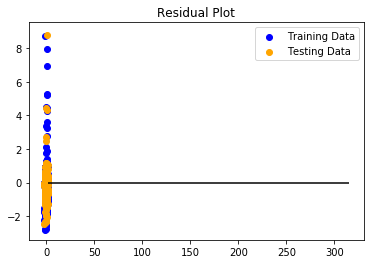

In [14]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

RIDGE REGRESSION WITH PD DUMMIES ON WELL BORE CODE

In [15]:
X = pd.get_dummies(df2)
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)
X.head()

,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WELL_BORE_CODE_NO 15/9-F-1 C,WELL_BORE_CODE_NO 15/9-F-11 H,WELL_BORE_CODE_NO 15/9-F-12 H,WELL_BORE_CODE_NO 15/9-F-14 H,WELL_BORE_CODE_NO 15/9-F-15 D
0,106.35,43.34,107.36,37.94,78.94,631.47,90439.09,0.0,1,0,0,0,0
1,107.64,47.17,99.19,60.76,70.63,1166.46,165720.39,0.0,1,0,0,0,0
2,107.87,47.73,94.60,63.05,66.05,1549.81,221707.31,0.0,1,0,0,0,0
3,107.97,48.53,89.99,64.55,61.41,1248.70,178063.52,0.0,1,0,0,0,0
4,108.05,49.84,84.78,65.72,56.15,1345.78,192602.19,0.0,1,0,0,0,0


Model:RIDGE REGRESSION WITH PD DUMMIES ON WELL BORE CODE
R2 Score: 0.7139069485888287
Mean Squared Error (MSE): 0.27748349853270116
R-squared (R2 ): 0.7139069485888287


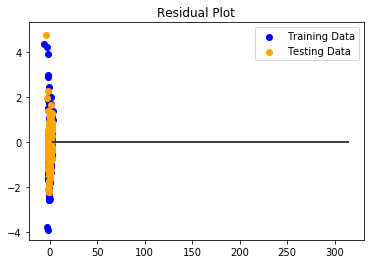

In [17]:
#Create Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

## training the model
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.05, normalize=True)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print("Model:RIDGE REGRESSION WITH PD DUMMIES ON WELL BORE CODE")
print(f"R2 Score: {score}")

from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
# Score the prediction with mse and r2
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s), model.predict(X_train_s) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s), model.predict(X_test_s) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

perf_dict.update(Model_Ridge_MSE_WB = mse)
perf_dict.update(Model_Ridge_R2_WB = r2)


In [18]:
#Calculae the feature importances
importances = model.coef_
sorted(zip(model.coef_[0],feature_names_2),reverse=True)

[(0.45877862549050363, 'AVG_WHT_P'),
 (0.2904179812290188, 'BORE_GAS_VOL'),
 (0.21179431759031925, 'AVG_DOWNHOLE_TEMPERATURE'),
 (0.19303779947809147, 'WELL_BORE_CODE'),
 (0.16568941008198285, 'AVG_CHOKE_SIZE_P'),
 (0.16258373817865568, 'AVG_WHP_P'),
 (-0.13576763504900805, 'BORE_WAT_VOL'),
 (-0.2874653730986602, 'DP_CHOKE_SIZE'),
 (-0.3321945234814142, 'BORE_OIL_VOL')]

LASSO REGRESSION

In [19]:
X = df1
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)
X.head()

,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,43.34,107.36,37.94,78.94,631.47,90439.09,0.0
1,47.17,99.19,60.76,70.63,1166.46,165720.39,0.0
2,47.73,94.60,63.05,66.05,1549.81,221707.31,0.0
3,48.53,89.99,64.55,61.41,1248.70,178063.52,0.0
4,49.84,84.78,65.72,56.15,1345.78,192602.19,0.0


Model:LASSO REGRESSION
R2 Score: 0.61462405158044
Mean Squared Error (MSE): 0.3790272945580398
R-squared (R2 ): 0.61462405158044


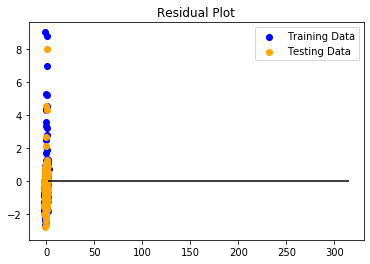

In [20]:
#Create Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

## training the model
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01, normalize=False)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print("Model:LASSO REGRESSION")
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s).reshape(-1,1), model.predict(X_train_s).reshape(-1,1) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s).reshape(-1,1), model.predict(X_test_s).reshape(-1,1) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

perf_dict.update(Model_LASSO_MSE = mse)
perf_dict.update(Model_LASSO_R2 = r2)

In [21]:
#Calculae the feature importances
importances = model.coef_
sorted(zip(model.coef_,feature_names),reverse=True)


[(0.8238668668796366, 'DP_CHOKE_SIZE'),
 (0.3910944458584104, 'BORE_WAT_VOL'),
 (0.31003242296629946, 'AVG_CHOKE_SIZE_P'),
 (0.26929343082438184, 'AVG_WHT_P'),
 (-0.0, 'BORE_OIL_VOL'),
 (0.0, 'AVG_WHP_P'),
 (-0.3256280660157849, 'BORE_GAS_VOL')]

LASSO REGRESSION WITH PD DUMMIES ON WELL BORE CODE

In [22]:
X = pd.get_dummies(df2)
y = data['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1,1)
X.head()

,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WELL_BORE_CODE_NO 15/9-F-1 C,WELL_BORE_CODE_NO 15/9-F-11 H,WELL_BORE_CODE_NO 15/9-F-12 H,WELL_BORE_CODE_NO 15/9-F-14 H,WELL_BORE_CODE_NO 15/9-F-15 D
0,106.35,43.34,107.36,37.94,78.94,631.47,90439.09,0.0,1,0,0,0,0
1,107.64,47.17,99.19,60.76,70.63,1166.46,165720.39,0.0,1,0,0,0,0
2,107.87,47.73,94.60,63.05,66.05,1549.81,221707.31,0.0,1,0,0,0,0
3,107.97,48.53,89.99,64.55,61.41,1248.70,178063.52,0.0,1,0,0,0,0
4,108.05,49.84,84.78,65.72,56.15,1345.78,192602.19,0.0,1,0,0,0,0


Model:LASSO REGRESSION
R2 Score: 0.7303106489200919
Mean Squared Error (MSE): 0.2652465093634855
R-squared (R2 ): 0.7303106489200919


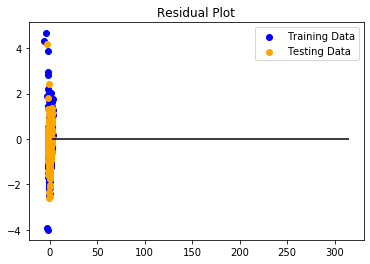

In [23]:
#Create Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler().fit(X_train)
X_train_s = x_scaler.transform(X_train)
X_test_s = x_scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit( y_train)
y_train_s = y_scaler.transform( y_train)
y_test_s = y_scaler.transform(y_test)

## training the model
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01, normalize=False)
model.fit(X_train_s,y_train_s)
score = model.score(X_test_s, y_test_s)
print("Model:LASSO REGRESSION")
print(f"R2 Score: {score}")

# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score
predicted_train = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, predicted_train)
r2 = r2_score(y_test_s, predicted_train)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train_s).reshape(-1,1), model.predict(X_train_s).reshape(-1,1) - y_train_s, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_s).reshape(-1,1), model.predict(X_test_s).reshape(-1,1) - y_test_s, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

perf_dict.update(Model_LASSO_MSE_WB = mse)
perf_dict.update(Model_LASSO_R2_WB = r2)

In [24]:
#Calculae the feature importances
importances = model.coef_
sorted(zip(model.coef_,feature_names_2),reverse=True)


[(0.665547214122256, 'AVG_WHT_P'),
 (0.3518396926918993, 'BORE_GAS_VOL'),
 (0.20375981369071153, 'WELL_BORE_CODE'),
 (0.20213663759714798, 'AVG_DOWNHOLE_TEMPERATURE'),
 (0.17732060191644164, 'AVG_WHP_P'),
 (-0.0, 'DP_CHOKE_SIZE'),
 (0.0, 'AVG_CHOKE_SIZE_P'),
 (-0.042795281593972806, 'BORE_WAT_VOL'),
 (-0.629986557256546, 'BORE_OIL_VOL')]

In [25]:
#Dictionary with scores

perf_dict

{'Model_Ridge_MSE': 0.40486835003412575,
 'Model_Ridge_R2': 0.582569694077074,
 'Model_Ridge_MSE_WB': 0.27748349853270116,
 'Model_Ridge_R2_WB': 0.7139069485888287,
 'Model_LASSO_MSE': 0.3790272945580398,
 'Model_LASSO_R2': 0.61462405158044,
 'Model_LASSO_MSE_WB': 0.2652465093634855,
 'Model_LASSO_R2_WB': 0.7303106489200919}